# Kinetic Monte Carlo: Esercizio 2 punto 2

## SVOLGIMENTO PUNTO 2

Perform growth simulations at 𝑇 = 650 𝐾 with deposition flux 𝜙 = [10, 1, 0.1, 0.01, 0.0001] 𝑀𝐿/𝑠, up to a nominal thickness of 𝜃 = 5 𝑀𝐿.

---

### 0) Importazioni e dati

In [1]:
import numpy as np
from CMS.MonteCarlo.KineticMonteCarlo import KineticMonteCarlo

### #) Simulazione

#### Dati

In [2]:
flux = [10., 1., 0.1, 0.01, 0.0001] # ML/s monolayers per secondo
temperature = 650  # K -> DIFFUSIONE
nominal_coverage = 5.0  # ML monolayers 
L = (60,60) # dimensioni della griglia in unità di celle cristalline

**Ricostruendo tutti i primi vicini ogni volta:**\
<20s per i primi 3 flussi insieme, 15s per 0.01, 6min per 0.0001

**Modificando solo i primi vicini coinvolti nel singolo evento (ma ricalcolando i rate completamente ogni volta):**\
10s per i primi 3 flussi insieme, 10s per 0.01, 4min30s per 0.0001

**Modificando solo i primi vicini coinvolti nel singolo evento (aggiornando solo i rate necessari):**\
4s per i primi 3 flussi insieme, 6s per 0.01, 1min30s per 0.0001

In [3]:
result_dict = {}

for f in flux:
    print(f"--- Inizio simulazione per flusso = {f} ML/s ---")
    # calcolo il tempo di simulazione necessario per raggiungere la copertura nominale
    simulation_time = nominal_coverage / f  # s secondi
    # eseguo la simulazione
    simulation = KineticMonteCarlo(L=L, flux=f, T=temperature, seed=42)
    # non puoi passargli il tempo come keyword argument end_time=sim_time sennò jitclass si lamenta 
    result = simulation.run(simulation_time)
    # salvo il risultato
    result_dict[f] = result

--- Inizio simulazione per flusso = 10.0 ML/s ---
--- Inizio simulazione per flusso = 1.0 ML/s ---
--- Inizio simulazione per flusso = 0.1 ML/s ---
--- Inizio simulazione per flusso = 0.01 ML/s ---
--- Inizio simulazione per flusso = 0.0001 ML/s ---


---

## Analisi risultati

Observe the different growth modes and compare the behavior of 𝜎(𝜃) . In the cases corresponding to layer-by-layer growth, what is the effect of decreasing 𝜙 (look at the early stages, e.g. after deposition of 0.1 𝑀𝐿)? Interpret the results. If the growth apparatus only works at 𝜙 = 1 𝑀𝐿/𝑠, is it possible to achieve the same behavior previously observed for 𝜙 = 0.01 𝑀𝐿/𝑠 by tuning the temperature?


### plot roughness

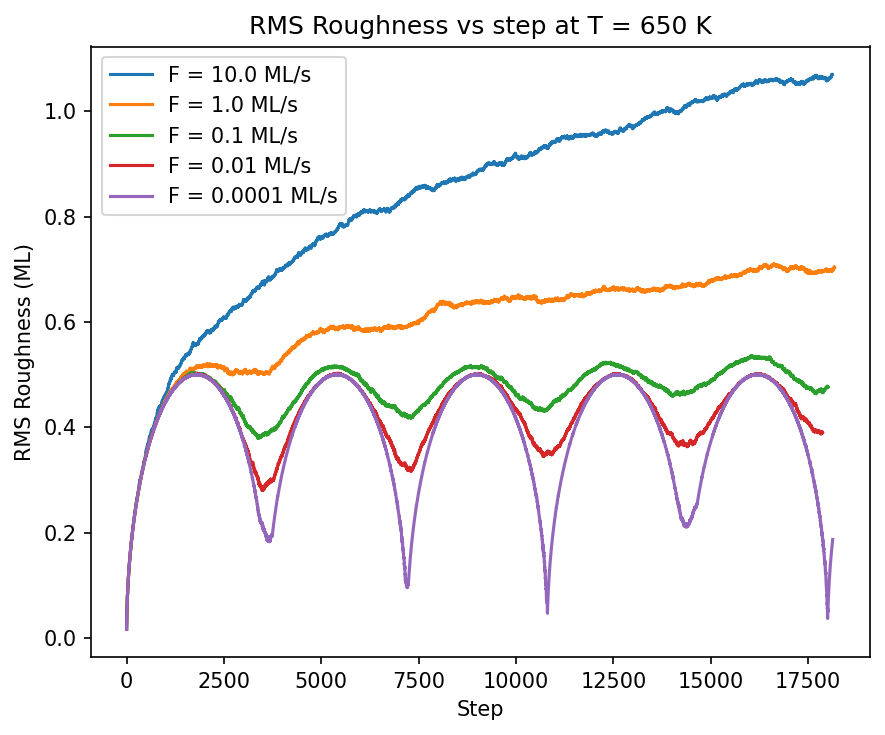

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,5), dpi=150)
for f in flux:
    # proviamo vs step invece che vs time
    plt.plot(range(len(result_dict[f].dt_list)), result_dict[f].rms_roughness_list, label=f"F = {f} ML/s")
plt.xlabel("Step")
plt.ylabel("RMS Roughness (ML)")
plt.title(f"RMS Roughness vs step at T = {temperature} K")
plt.legend()
plt.tight_layout()
plt.show()

In [5]:
# rifaccio 1 ML/s ma a 800 k per vedere se riesco a ricostruire il comportamento di 0.01 a 650
simulation_time = nominal_coverage / 1  # s secondi
# eseguo la simulazione
simulation = KineticMonteCarlo(L=L, flux=1, T=800, seed=42)
# non puoi passargli il tempo come keyword argument end_time=sim_time sennò jitclass si lamenta 
result = simulation.run(simulation_time)

### Ricreare il comportamento di 0.01 ML/s a 650 K con 1 ML/s tunando T

**COME PREVEDO LA TEMPERATURA?**

Per mantenere la stessa morfologia (stessa curva di rugosità), devi mantenere costante il rapporto tra la velocità di diffusione e la velocità di deposizione:
$$
\frac{D(T_1)}{\phi_1} \approx \frac{D(T_2)}{\phi_2}
$$
Sappiamo che il tasso di diffusione su una terrazza piatta (l'evento chiave per la nucleazione) segue la legge di Arrhenius:
$$
D(T) \approx \nu e^{-\frac{E_b}{k_B T}}
$$
dove $E_b=−J_0=1.38 eV$. Imponendo l'uguaglianza dei rapporti, otteniamo la formula per la nuova temperatura $T_2$:
$$
\frac{1}{T_2} = \frac{1}{T_1} - \frac{k_B}{E_b} \ln{\frac{\phi_2}{\phi_1}}
$$
si ha:
- $\frac{\phi_2}{\phi_1}$ = 100
- $T_1 = 650 K$

per cui: $T_2 \approx 800 K$ 
​

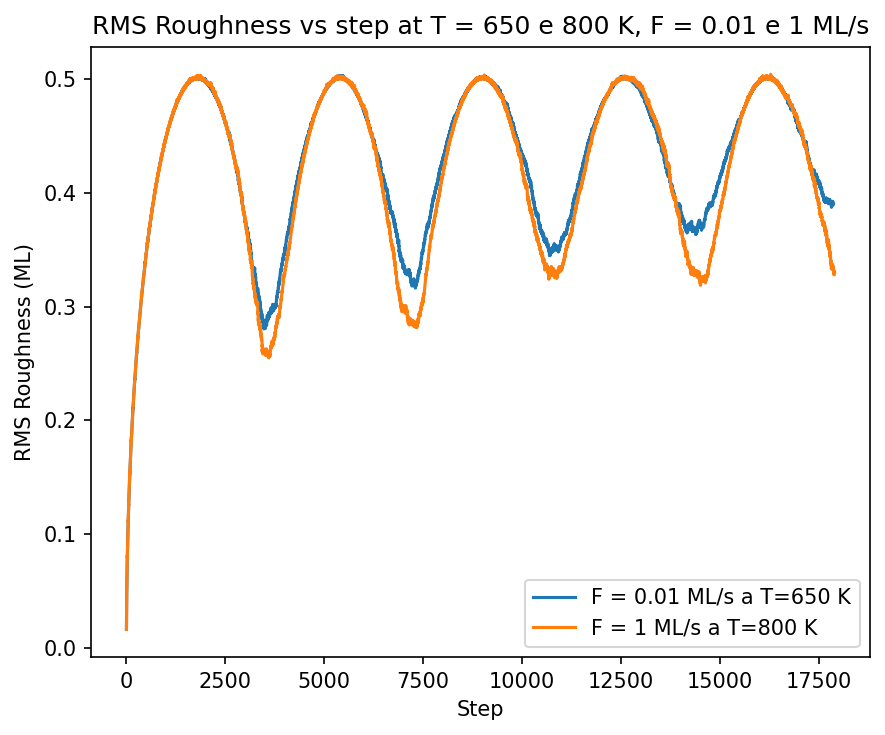

In [6]:
plt.figure(figsize=(6,5), dpi=150)
plt.plot(range(len(result_dict[0.01].dt_list)), result_dict[0.01].rms_roughness_list, label=f"F = 0.01 ML/s a T=650 K")
plt.plot(range(len(result.dt_list)), result.rms_roughness_list, label=f"F = 1 ML/s a T=800 K")
plt.xlabel("Step")
plt.ylabel("RMS Roughness (ML)")
plt.title(f"RMS Roughness vs step at T = 650 e 800 K, F = 0.01 e 1 ML/s")
plt.legend()
plt.tight_layout()
plt.show()